In [1]:
#Importando todo lo necesario
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
#Para leer los archivos
df = pd.read_csv("dfsargento270218.csv", header=None, skiprows=1, names=['#','DateTime', 'Pres', 'Temp','WaterLvl'])
df.head()

,#,DateTime,Pres,Temp,WaterLvl
0,1,02 04 2018 09:45:00,108.068,17.094,0.060
1,2,02 04 2018 10:00:00,107.815,16.903,0.035
2,3,02 04 2018 10:15:00,107.791,16.903,0.032
3,4,02 04 2018 10:30:00,107.791,16.903,0.032
4,5,02 04 2018 10:45:00,107.791,16.903,0.032


In [3]:
#Extraer el mes
df['Ndate'] = pd.to_datetime(df['DateTime'], format='%m %d %Y %H:%M:%S')
df['month'] = df['Ndate'].dt.month
df.head()

,#,DateTime,Pres,Temp,WaterLvl,Ndate,month
0,1,02 04 2018 09:45:00,108.068,17.094,0.060,2018-02-04 09:45:00,2
1,2,02 04 2018 10:00:00,107.815,16.903,0.035,2018-02-04 10:00:00,2
2,3,02 04 2018 10:15:00,107.791,16.903,0.032,2018-02-04 10:15:00,2
3,4,02 04 2018 10:30:00,107.791,16.903,0.032,2018-02-04 10:30:00,2
4,5,02 04 2018 10:45:00,107.791,16.903,0.032,2018-02-04 10:45:00,2


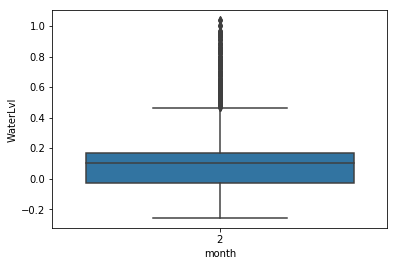

In [4]:
#a.Boxplot de Nivel del agua
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="month", y="WaterLvl", data=df)
plt.show()

In [5]:
##Leyendo archivo de salinidad
dg = pd.read_csv("dfsalinidad.csv", header=None, skiprows=3, names=['#','DateTime','Cond','Temp','Spec','Sali'])
dg.head()

,#,DateTime,Cond,Temp,Spec,Sali
0,2,02 04 2018 09:45:00,50617.2,17.33,59362.4,39.7235
1,3,02 04 2018 10:00:00,50646.3,17.23,59526.8,39.8482
2,4,02 04 2018 10:15:00,50772.9,17.17,59753.7,40.0203
3,5,02 04 2018 10:30:00,51007.8,17.14,60068.6,40.2595
4,6,02 04 2018 10:45:00,50958.7,17.11,60050.6,40.2458


In [6]:
#Extraer el mes
dg['Ndate'] = pd.to_datetime(dg['DateTime'], format='%m %d %Y %H:%M:%S')
dg['month'] = dg['Ndate'].dt.month
dg.head()

,#,DateTime,Cond,Temp,Spec,Sali,Ndate,month
0,2,02 04 2018 09:45:00,50617.2,17.33,59362.4,39.7235,2018-02-04 09:45:00,2
1,3,02 04 2018 10:00:00,50646.3,17.23,59526.8,39.8482,2018-02-04 10:00:00,2
2,4,02 04 2018 10:15:00,50772.9,17.17,59753.7,40.0203,2018-02-04 10:15:00,2
3,5,02 04 2018 10:30:00,51007.8,17.14,60068.6,40.2595,2018-02-04 10:30:00,2
4,6,02 04 2018 10:45:00,50958.7,17.11,60050.6,40.2458,2018-02-04 10:45:00,2


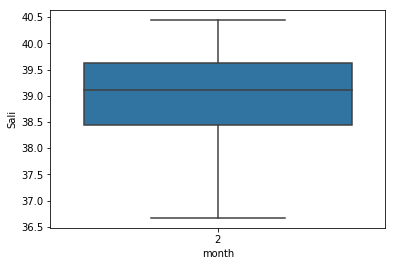

In [7]:
#b.Boxplot de Salinidad
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="month", y="Sali", data=dg)
plt.show()

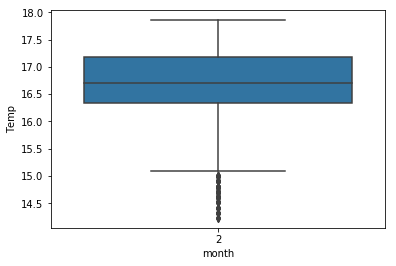

In [8]:
#c.Boxplot de Temperatura p/primer archivo
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="month", y="Temp", data=df)
plt.show()

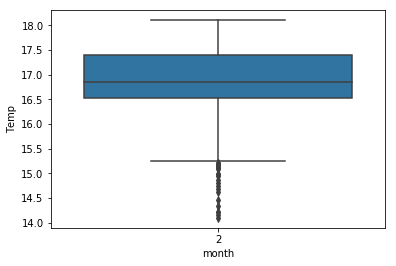

In [9]:
#c.Boxplot de Temperatura p/segundo archivo
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="month", y="Temp", data=dg)
plt.show()

In [10]:
#Concatenando dataframes
dh=pd.concat([df['#'],df['DateTime'],df['WaterLvl'],dg['Sali'],dg['Temp']], axis=1)
dh.head()

,#,DateTime,WaterLvl,Sali,Temp
0,1.0,02 04 2018 09:45:00,0.060,39.7235,17.33
1,2.0,02 04 2018 10:00:00,0.035,39.8482,17.23
2,3.0,02 04 2018 10:15:00,0.032,40.0203,17.17
3,4.0,02 04 2018 10:30:00,0.032,40.2595,17.14
4,5.0,02 04 2018 10:45:00,0.032,40.2458,17.11


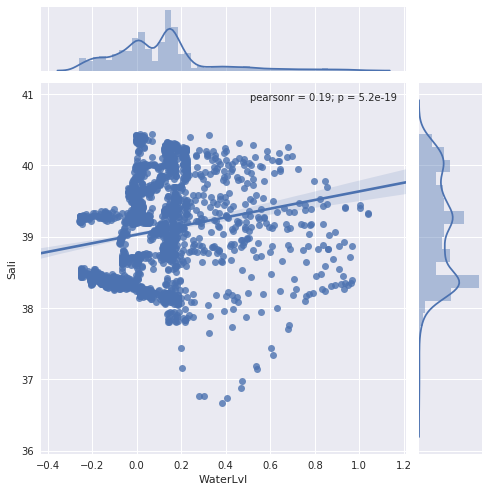

In [11]:
#Nivel de mar-salinidad
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("WaterLvl", "Sali", data=dh, kind="reg",
                   color="b", size=7)
plt.show(g)

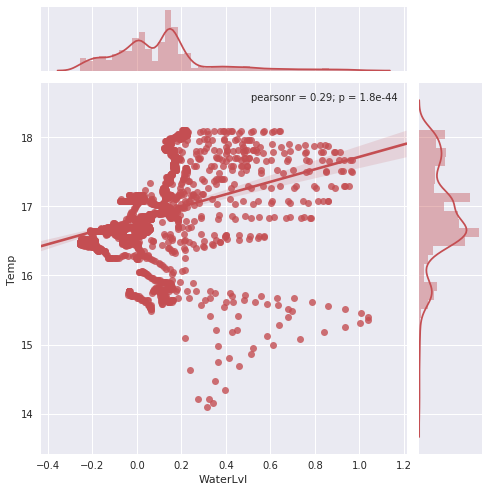

In [12]:
#Nivel de mar-Temp
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("WaterLvl", "Temp", data=dh, kind="reg",
                   color="r", size=7)
plt.show(g)

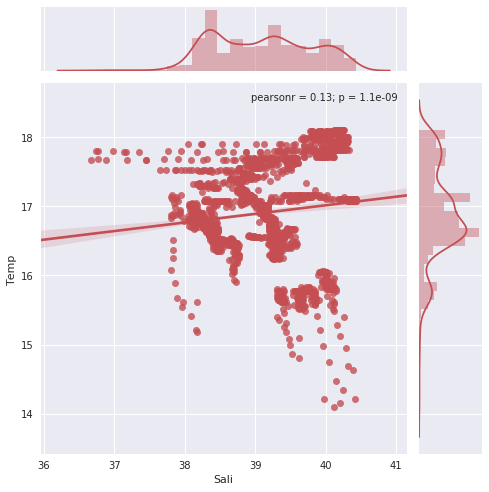

In [13]:
#Salinidad-Temperatura
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("Sali", "Temp", data=dh, kind="reg",
                   color="r", size=7)
plt.show(g)

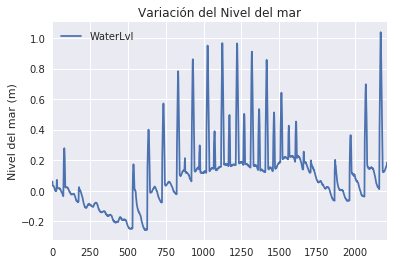

In [14]:
#Gráfica Nivel del mar
plt.figure(); dh.WaterLvl.plot(); plt.legend(loc='best')
plt.title("Variación del Nivel del mar")
plt.ylabel("Nivel del mar (m)")
plt.grid(True)
plt.show()

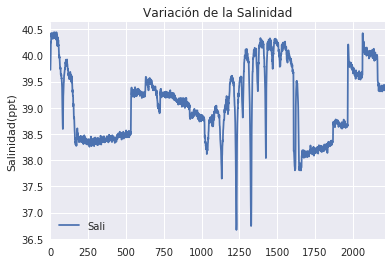

In [15]:
plt.figure(); dh.Sali.plot(); plt.legend(loc='best')
plt.title("Variación de la Salinidad")
plt.ylabel("Salinidad(ppt)")
plt.grid(True)
plt.show()

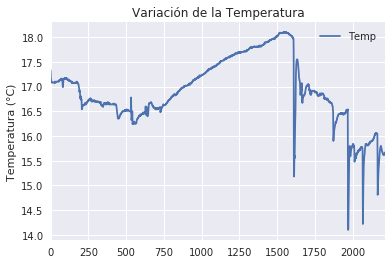

In [16]:
plt.figure(); dh.Temp.plot(); plt.legend(loc='best')
plt.title("Variación de la Temperatura")
plt.ylabel("Temperatura (°C)")
plt.grid(True)
plt.show()

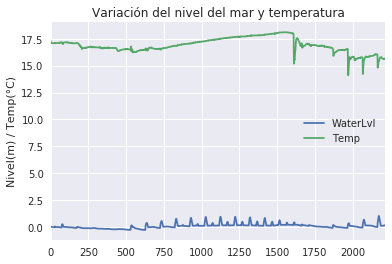

In [17]:
#Nivel de mar-temperatura
df1 = dh[['WaterLvl','Temp']]
plt.figure(); df1.plot(); plt.legend(loc='best')
plt.title("Variación del nivel del mar y temperatura")
plt.ylabel("Nivel(m) / Temp(°C)")
plt.grid(True)
plt.show()


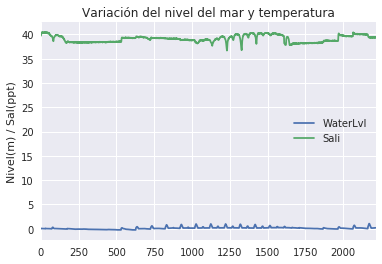

In [18]:
#Nivel del mar-salinidad
df2 = dh[['WaterLvl','Sali']]
plt.figure(); df2.plot(); plt.legend(loc='best')
plt.title("Variación del nivel del mar y temperatura")
plt.ylabel("Nivel(m) / Sal(ppt)")
plt.grid(True)
plt.show()

In [19]:
dh.head()

,#,DateTime,WaterLvl,Sali,Temp
0,1.0,02 04 2018 09:45:00,0.060,39.7235,17.33
1,2.0,02 04 2018 10:00:00,0.035,39.8482,17.23
2,3.0,02 04 2018 10:15:00,0.032,40.0203,17.17
3,4.0,02 04 2018 10:30:00,0.032,40.2595,17.14
4,5.0,02 04 2018 10:45:00,0.032,40.2458,17.11


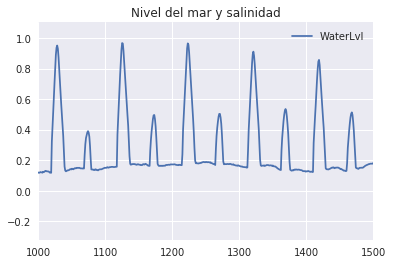

In [20]:
#5 dias nivel del mar-sali
df3 = dh[['WaterLvl','Sali']]
t=dh['#']
s=dh['WaterLvl']
plt.figure(); plt.plot(t,s); plt.legend(loc='best')
plt.title("Nivel del mar y salinidad")
axes = plt.gca()
axes.set_xlim([1000,1500])
plt.grid(True)
plt.show()

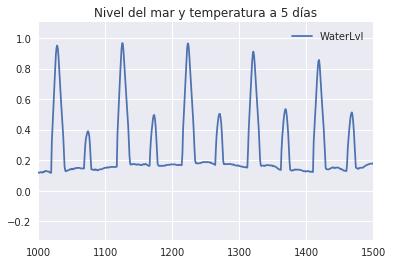

In [21]:
#5 dias nivel del mar-temp
df4 = dh[['WaterLvl','Temp']]
t=dh['#']
s=dh['WaterLvl']
plt.figure(); plt.plot(t,s); plt.legend(loc='best')
plt.title("Nivel del mar y temperatura a 5 días")
axes = plt.gca()
axes.set_xlim([1000,1500])
plt.grid(True)
plt.show()